Importações

In [29]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Funções

In [30]:
def simulate_infection(graph: nx.Graph, beta: float, mi: float, initial_nodes: int, max_iter: int, simulation: int) -> np.array:
    history = np.zeros((simulation, max_iter))
    
    for i in range(simulation):
        # Gerar conjunto de infectados
        infected = set(np.random.choice(a=graph.nodes(), size=initial_nodes, replace=False))
        
        for j in range(max_iter):
            new_recovered = set()
            new_infected = set()

            # Marcar novos infectados
            for node in infected:
                for susceptible in graph.neighbors(node):
                    if not susceptible in infected and np.random.rand() < beta:
                        new_infected.add(susceptible)
    
            # Marcar novos recuperados
            for node in infected:
                if np.random.rand() < mi:
                    new_recovered.add(node)
            
            # Atualizar lista de infectados
            infected -= new_recovered
            infected |= new_infected
            
            # Atualizar history
            infected_count = len(infected)
            history[i, j] = infected_count
            
            # Epidemia extinta
            if infected_count == 0:  
                break
            
    return np.mean(history, axis=0) / graph.number_of_nodes()

Constantes

In [ ]:
N = 10000
k = 20
max_iter = 100
simulation = 10 #TODO: mudar para 100 antes de enviar, deixei assim para nao demora tanto testando
initial_nodes = 5
beta1 = 0.02
beta2 = 0.01
mi1 = [0.1, 0.4, 0.5]
mi2 = [0.1, 0.2, 0.3]

Gerar grafos

In [32]:
G1 = nx.erdos_renyi_graph(n=N, p=k/(N-1), seed=42)
G2 = nx.barabasi_albert_graph(n=N, m=k//2, seed=42) #TODO: precisa criar funcao propria para gamma=2.5, a barabasi_albert_graph infere gamma=3

Verificar grau médio

In [39]:
average_degree = lambda x: np.mean(np.array([grau for _, grau in x.degree()]))

print("Grau médio de G1:", average_degree(G1))
print("Grau médio de G2:", average_degree(G2))


Grau médio de G1: 19.9606
Grau médio de G2: 19.98


Simular infecção

In [33]:
infected_fraction1 = [simulate_infection(G1, beta1, mi, initial_nodes, max_iter, simulation) for mi in mi1]

In [34]:
infected_fraction2 = [simulate_infection(G2, beta2, mi, initial_nodes, max_iter, simulation) for mi in mi2]

Plotar gráficos

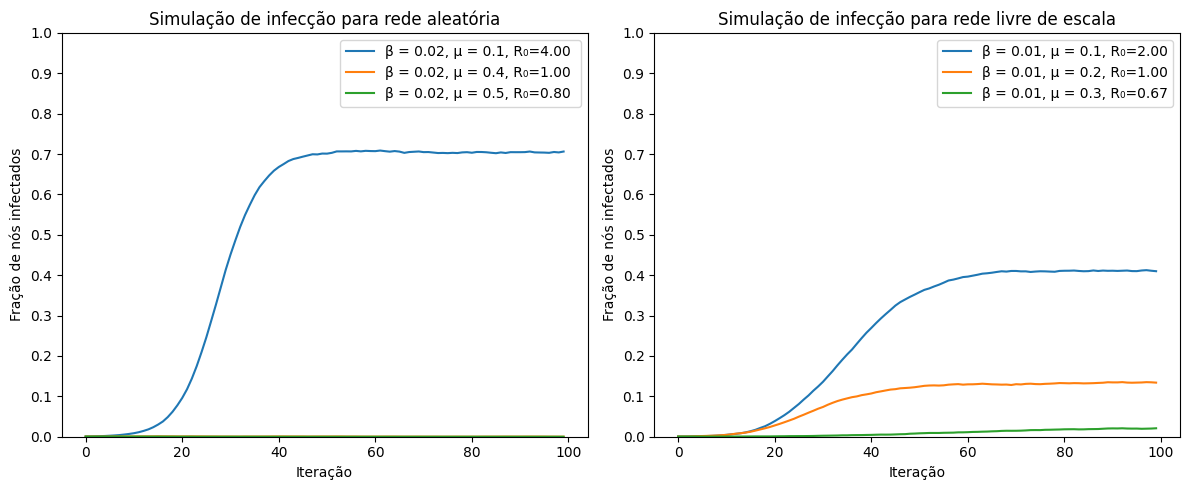

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(infected_fraction1[i], label=f'β = {beta1}, μ = {mi1[i]}, R₀={((beta1 * k) / mi1[i]):.2f} ')
plt.title('Simulação de infecção para rede aleatória')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(infected_fraction2[i], label=f'β = {beta2}, μ = {mi2[i]}, R₀={((beta2 * k) / mi2[i]):.2f}')
plt.title('Simulação de infecção para rede livre de escala')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.tight_layout()
plt.show()

#TODO: Mostre que se $𝑅_0= \frac{\beta \hat{k} }{\mu} \gt 1$  então a doença se fixa na rede no modelo SIS de campo médio.


#TODO: Descreva o comportamento da epidemia (2) e compare com o item (1)

In [36]:
def vaccinated_strategies(num_vaccinated):
    vaccinated_random = np.random.choice(N, num_vaccinated)
    vaccinated_hubs = [node for node, _ in sorted(G2.degree, key=lambda x: x[1], reverse=True)[:num_vaccinated]]

    neighbors = set()
    for v in vaccinated_random:
        neighbors.update(G2.neighbors(v))
    neighbors -= set(neighbors)
    vaccinated_neighbor = list(neighbors)[:num_vaccinated]
    
    return [vaccinated_random, vaccinated_hubs, vaccinated_neighbor]


In [37]:
num_vaccinated = 500 #TODO: descobrir esse numero como se pede

infected_fraction3 = [infected_fraction2[0]]
for vaccinated in vaccinated_strategies(num_vaccinated):
    G_temp = G2.copy()
    G_temp.remove_nodes_from(vaccinated)
    infected_fraction3.append(simulate_infection(G_temp, beta2, mi2[0], initial_nodes, max_iter, simulation))
    

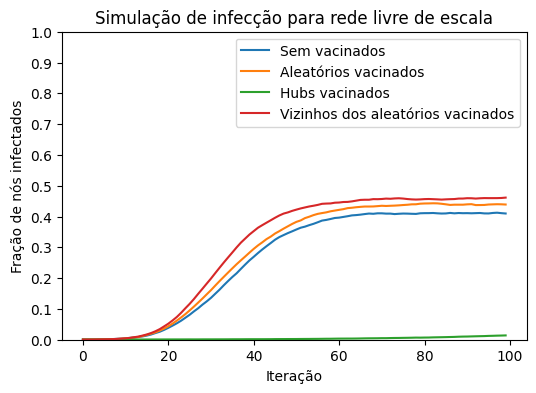

In [38]:
plt.figure(figsize=(6,4))
plt.plot(infected_fraction3[0], label='Sem vacinados')
plt.plot(infected_fraction3[1], label='Aleatórios vacinados')
plt.plot(infected_fraction3[2], label='Hubs vacinados')
plt.plot(infected_fraction3[3], label='Vizinhos dos aleatórios vacinados')
plt.title('Simulação de infecção para rede livre de escala')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.show()

#TODO: Descreva (brevemente, com um ou dois parágrafos) como a fração de vacinados em cada caso
se relaciona com o tema de robustez da rede visto em sala de aula.